In [1]:
from skimage import io
import matplotlib.pyplot as plt

# Program 1

Write a python program to perform Basic Operations
load, display and save the images with skimage
library.


(1565, 1565, 3)
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


(-0.5, 1564.5, 1564.5, -0.5)

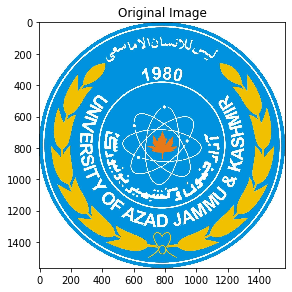

In [2]:
image = io.imread("C:/Users/XyloCrafts/Desktop/uajk logo.jpg")
print(image.shape)
print(image)
io.imshow(image)
plt.title('Original Image')
plt.axis('on')

In [3]:
# Save the image
io.imsave('univercity.png', image)


# Program 2

Write a python program to perform Transformations
like resize(), rotate() or rescale() on the Images with
skimage library.


In [4]:
from skimage import io, transform
import matplotlib.pyplot as plt

In [5]:
# Load an image
image = io.imread("C:/Users/XyloCrafts/Desktop/nature.jpg")

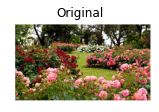

In [6]:
# Display the original image
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title('Original')
plt.axis('off')
plt.show()

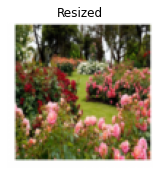

In [7]:
# Resize the image to any pixels
resized_image = transform.resize(image, (100, 100))

# Display the Resized images
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 2)
plt.imshow(resized_image)
plt.title('Resized')
plt.axis('off')
plt.show()

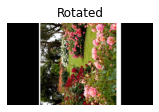

In [8]:
# Rotate the image by any degrees
rotated_image = transform.rotate(image, 90)

# Display the Rotate images
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 3)
plt.imshow(rotated_image)
plt.title('Rotated')
plt.axis('off')
plt.show()

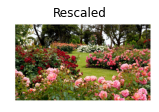

In [9]:
# Rescale the image by a factor of 0.5 (reduce size to half)
rescaled_image = transform.rescale(image, 0.5, channel_axis=-1)

# Display the Rescale images
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 4)
plt.imshow(rescaled_image)
plt.title('Rescaled')
plt.axis('off')

plt.show()


# Program 3

# Manipulating pixels:
Python script to ignore low intensity pixels in an image

In [10]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt


In [11]:
# Load an image
image = io.imread("C:/Users/XyloCrafts/Desktop/black.jpeg")

In [12]:
# Convert the image to grayscale
gray_image = np.mean(image, axis=2)

In [13]:
# Define an intensity threshold
threshold = 100  # You can adjust this value

# Create a mask for pixels above the threshold
mask = gray_image >= threshold

In [14]:
# Apply the mask to the grayscale image
# Pixels below the threshold are set to 0 (black)
filtered_image = gray_image * mask

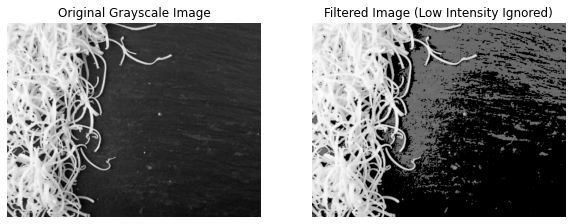

In [15]:
# Display the original and filtered images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (Low Intensity Ignored)')
plt.axis('off')

plt.show()

# Program 4
Python script to load a color image as
grayscale

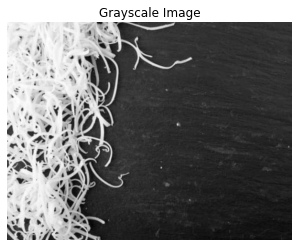

In [16]:
# Load a color image as grayscale
gray_image = io.imread("C:/Users/XyloCrafts/Desktop/black.jpeg", as_gray=True)

# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()


# Program 5 to 7

Write python programs to perform Connected
Component Analysis of images with skimage library.
 Turn the image into grayscale, denoise it and
apply a threshold so we can obtain a binary
mask
 Counting Objects and Removing the Ones with
Smaller Areas

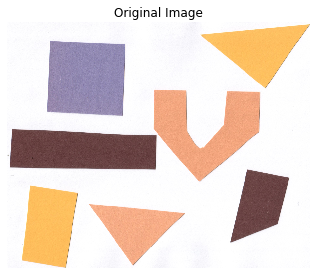

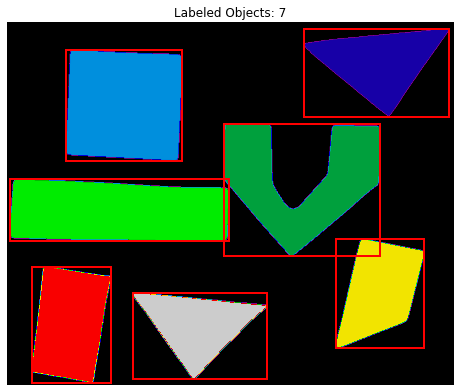

In [3]:
# Load necessary libraries
import skimage.io
import skimage.color
import skimage.filters
import numpy as np
import skimage.measure
import skimage.morphology as morph
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load and display the image
image_path = "C:/Users/XyloCrafts/Desktop/shapes.png"
LOAD_IMAGE = skimage.io.imread(image_path)

# Check if the image has an alpha channel and remove it if necessary
if LOAD_IMAGE.shape[-1] == 4:  # Image has an alpha channel
    LOAD_IMAGE = LOAD_IMAGE[:, :, :3]  # Discard the alpha channel

skimage.io.imshow(LOAD_IMAGE)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Turn the image to grayscale
gray_LOAD_IMAGE = skimage.color.rgb2gray(LOAD_IMAGE)

# Denoise the image
blurred_LOAD_IMAGE = skimage.filters.gaussian(gray_LOAD_IMAGE, sigma=4)

# Apply a threshold of 0.7 to the image
threshold = 0.8
binary_mask = blurred_LOAD_IMAGE < threshold

# Create an all-zero values array with the same shape as our binary mask
image = np.zeros(shape=binary_mask.shape)

# Apply the mask to the array. Only detected objects will be shown as white (value of 1),
# the rest will be set to black (value of 0)
image[binary_mask] = 1

# Remove small objects from the binary image
cleaned_image = morph.remove_small_objects(image.astype(bool), min_size=100)

# Perform Connected Component Analysis (CCA) on the cleaned image
labels = skimage.measure.label(cleaned_image)

# Count the number of remaining objects
object_count = labels.max()

# Display the labeled objects
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(labels, cmap='nipy_spectral')
ax.set_title(f'Labeled Objects: {object_count}')
ax.axis('off')

# Optionally, highlight bounding boxes for each object
for region in skimage.measure.regionprops(labels):
    # Draw a rectangle around the segmented objects
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

plt.show()


# Program 8

In [20]:
import matplotlib.pyplot as plt
from skimage import io, color, exposure

# Load the image
image = io.imread("C:/Users/XyloCrafts/Desktop/plant-seedling.jpg")  # Replace with your image path

# Convert to grayscale if needed
grayscale_image = color.rgb2gray(image)

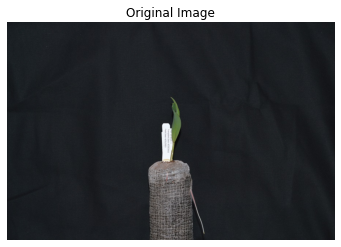

In [21]:
# Display original image (subplot 1)

plt.imshow(image)
plt.title("Original Image")
plt.axis('off') 
plt.show()

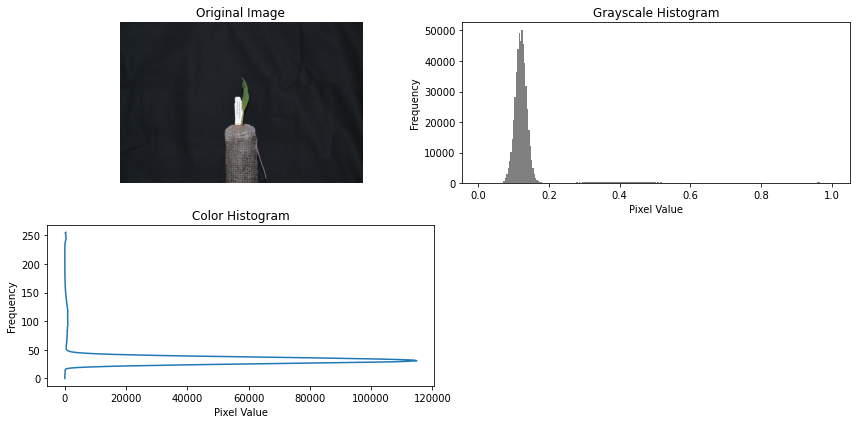

In [22]:
# Create a figure with subplots
plt.figure(figsize=(12, 6))

# Display original image (subplot 1)
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off') 

# Plot grayscale histogram (subplot 2)
plt.subplot(2, 2, 2)
plt.hist(grayscale_image.ravel(), bins=256, color='gray')
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Plot color histogram (subplot 3)
plt.subplot(2, 2, 3)
color_histogram = exposure.histogram(image)
plt.plot(color_histogram[0], color_histogram[1])
plt.title('Color Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

In [23]:
image.shape

(598, 900, 3)

In [27]:
color_histogram

(array([    69,     12,     10,     16,     18,     29,     29,     58,
            86,    124,    138,    147,    122,    122,    125,    138,
           251,    559,   1568,   3793,   7771,  13521,  21381,  31001,
         41944,  55338,  70281,  84601,  96978, 106854, 112071, 114944,
        114118, 109422, 102036,  92145,  80913,  67875,  54616,  42973,
         31970,  23356,  16040,  10733,   7045,   4385,   2722,   1708,
          1181,    791,    654,    486,    466,    486,    480,    484,
           492,    493,    510,    510,    557,    581,    576,    665,
           633,    636,    685,    675,    641,    709,    735,    678,
           754,    759,    770,    811,    766,    765,    803,    827,
           842,    798,    779,    788,    835,    806,    890,    880,
           887,    889,    877,    920,    922,   1001,   1033,   1039,
           972,    978,    991,    944,    957,    995,    980,    942,
           948,    984,    986,    935,    926,   1014,    942, 